In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def GaussianBlur(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return image

def PrewittFilter(image):
    gradImg = np.zeros(image.shape)
    G_x = np.zeros(image.shape)
    G_y = np.zeros(image.shape)
    size = image.shape
    kernel_x = np.array(([-1, 0, 1], [-1, 0, 1], [-1, 0, 1]))
    kernel_y = np.array(([-1, -1, -1], [0, 0, 0], [1, 1, 1]))
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            G_x[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            G_y[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))
    
    gradImg = np.sqrt(np.square(G_x) + np.square(G_y))
    gradImg = np.multiply(gradImg, 255.0 / gradImg.max())

    angles = np.rad2deg(np.arctan2(G_y, G_x))
    angles[angles < 0] += 180
    gradImg = gradImg.astype('uint8')
    return gradImg, angles


def non_maximum_suppression(image, angles):
    size = image.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                #value_to_compare = max(image[i - 1, j], image[i + 1, j])
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                #value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                #value_to_compare = max(image[i, j - 1], image[i, j + 1])
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                #value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    suppressed = suppressed.astype('uint8')
    return suppressed


In [23]:
fname = 'PrewittEdgeDetector\circlegrey'
img_gray = cv2.imread(fname+'.tif',0)
img_blur = GaussianBlur(img_gray)
grad,phase = PrewittFilter(img_blur)
nms = non_maximum_suppression(grad,phase)

Gradiant Image


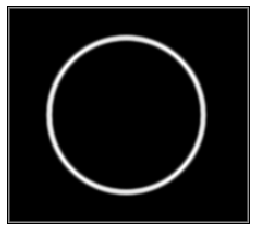

In [24]:
print("Gradiant Image")
#plt.imshow(grad,cmap='gray')
#plt.axis('off')
cv2.imshow('Grad',grad)
cv2.imwrite(fname+'_gradMag_preNMS.png',grad)
cv2.waitKey(0)
cv2.destroyAllWindows()

#plt.savefig(fname+'_gradMag_preNMS.png',bbox_inches='tight')

Non-Maxima Suppression Image


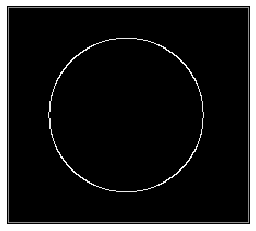

In [25]:
print("Non-Maxima Suppression Image")
#plt.imshow(nms,cmap='gray')
#plt.axis('off')
cv2.imshow('NMS',nms)
cv2.imwrite(fname+'_gradMag_postNMS.png',nms)
cv2.waitKey(0)
cv2.destroyAllWindows()

#plt.savefig(fname+'_gradMag_postNMS.png',bbox_inches='tight')